In [76]:
from qutip import*
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sms
import matplotlib.ticker as tck

In [77]:
def f0_t(t, args):
    """ Returns the value of the detuning delta.
        Must receive the value of delta.                """
    return  args["delta"] 

In [78]:
def f1_t(t, args):
    """ Returns the value of the driving function.
        Must receive a sweep rate u.                """
    return  t * args["sweep_rate"] # Linear control (Landau-Zener -> u t) 

In [79]:
def h_t(t,args):
    """ Evaluates the Hamiltonian at time t"""
    return f0_t(t,args)*H0 + f1_t(t,args)*H1

In [80]:
def compute_p(args):
    """Calculates the value of P for a given set o u and delta"""
    
    u = args['sweep_rate']
    delta = args['delta']
    tau = utau/u
    t1 = -tau
    t2 = 0

    tlist = np.linspace(t1,t2,steps) #the list of times depends on the parameters
    excited_t1 = h_t(t1,args).eigenstates()[1][1]
    excited_t2 = h_t(t2,args).eigenstates()[1][1]

    H = [[H0,f0_t],[H1,f1_t]]
    psi0 = excited_t1
    result = sesolve(H,psi0,tlist,args=args)
    final_state = result.states[-1]
    P = ((excited_t2.dag()*final_state)*(final_state.dag()*excited_t2)).norm() #Permanence probab
    
    return P

    

In [81]:
steps = 100 #size of the step (precision of simulation)
utau = 0.5 #size of the gap
H0 = sigmaz() #time-independent term, does not include delta
H1 = sigmax() #time-dependent term

In [82]:
param_step = 50
u_list = np.linspace(0.005,0.5,param_step)
delta_list = np.linspace(0.01,2,param_step)
u_array = np.array(u_list)
delta_array = np.array(delta_list)

In [83]:
p_array = np.empty(shape=(param_step, param_step), dtype='object')

In [84]:
for i in range(param_step):
    for j in range(param_step):
        args = {'sweep_rate':u_array[i],'delta':delta_array[j]}
        p_value=compute_p(args)
        p_array[i,j] = p_value

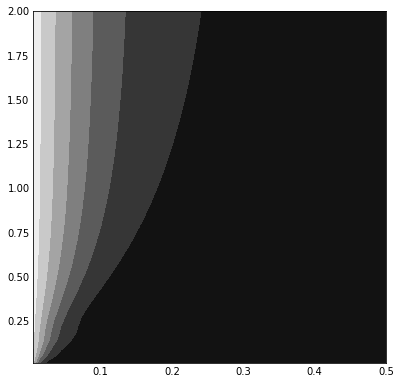

In [85]:
f,ax = plt.subplots(figsize=(5,5))
plt.contourf(u_array,delta_array,p_array,cmap='gray_r')